![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# FINAL PROJECT

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-10-29)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/Final_project/DSF_FINAL_PROJECT.ipynb)

# Regarding the final project for the class

The final project for the class will need to draw from everything you have covered in class, at least everything relevant for your final project. For that you will need to choose a topic. You will be using **the image and text** datasets that we have seen on our sessions. 

It doesn't need to be a super revolutionary idea, but at least have in mind the issue of reducing the time between information and action. And you will need to send it to me. 

The project will need to contain the following steps:

1. Ingesting, exploring and cleaning data for your project
2. Choosing/testing of algorithm approach
3. Visualizing the results
4. Packaging the project into a product

You will be using code from class to support you on the second, third and forth parts of the project. 

I am not looking for excellence, and I do not mind that you copy/paste code, but always try to understand why. 

In [1]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run DSF_FINAL_PROJECT_Helper.ipynb
%run DSF_FINAL_PROJECT_Helper_General.ipynb
%run DSF_FINAL_PROJECT_Plot.ipynb

<h1 style="background-color:powderblue;">Twitter Ingestion</h1>

In [2]:
twitterAuthentication = TwitterAuthentication(version = "1.0")
api = twitterAuthentication.connect()

In [3]:
#Connecting to sqlite3 database
dbConn = Sqlite3Db('social_network.db')

In [4]:
#Creating tweet Dates table
dbConn.query('''CREATE TABLE IF NOT EXISTS TweetDates(firstdate timestamp, lastdate timestamp)''')

In [5]:
#Creating tweets table
dbConn.query('''CREATE TABLE IF NOT EXISTS Tweets(insert_timestamp timestamp, tweet_timestamp timestamp, tweet_term TEXT, tweet TEXT, place_type TEXT, place_name TEXT, place_full_name TEXT, place_country_code TEXT, place_country TEXT)''')

In [69]:
twitterProcess = TwitterProcess(api = api, dbConn = dbConn)
limit, remaining, next_reset_time = twitterProcess.get_api_limits()
print(limit, remaining, next_reset_time)

180 180 2021-01-09 17:33:55


In [7]:
#Exit when we cannot continue
#if remaining == 0:
#    quit()

In [8]:
dbConn.query('''SELECT count(1) cant FROM TweetDates; ''')
sql_stm_res = dbConn.cursor.fetchall()

In [9]:
sqlite3DbHelper = Sqlite3DbHelper(dbConn = dbConn)
query_stm_res = sqlite3DbHelper.get_count_stm(sql_stm_res)
query_stm_res

1

In [10]:
firstdate = sqlite3DbHelper.get_timestamp_start_date()
print(firstdate)

2021-01-02 09:38:27.498429+00:00


In [11]:
firstdate, lastdate = sqlite3DbHelper.get_process_dates(query_stm_res)
print(firstdate)
print(lastdate)

two
2021-01-08 23:32:37.700410
2021-01-09 09:38:27.534057+00:00


In [12]:
getTimestampStartDate = sqlite3DbHelper.get_timestamp_start_date()
getTimestampStartDate

datetime.datetime(2021, 1, 2, 9, 38, 27, 550578, tzinfo=datetime.timezone.utc)

In [13]:
start_date = firstdate.date()
end_date = lastdate.date()

delta = dt.timedelta(days=1)

while start_date < end_date:
    dt_twitter_start = start_date
    dt_twitter_end   = start_date + (dt.timedelta(days=1))
    print(dt_twitter_start, "-", dt_twitter_end)
    start_date += delta

2021-01-08 - 2021-01-09


In [14]:
#We don't need to run the process from Jupyter notebook (we create a background process for that).
#So, we stablished the constant to False 
PROCESS_TWITTER = False
if PROCESS_TWITTER:
    noOfSearch = 1
    test = twitterProcess.ins_twitter_tweets_loop(firstdate = firstdate, lastdate = lastdate, noOfSearch = noOfSearch)
    test

In [15]:
dbConn.close()

<h1 style="background-color:powderblue;">Descriptive analysis</h1>

In [16]:
#!conda install -c conda-forge tweepy -y

In [17]:
#import os
#os.system("conda env list")

In [18]:
#!python -m spacy download en_core_web_lg

In [19]:
#!python -m spacy download en

In [20]:
#!python --version

In [21]:
#!which python

In [22]:
#Connecting to sqlite3 database
dbConn = Sqlite3Db('social_network.db')

In [23]:
dbConn.query('''SELECT insert_timestamp, tweet_timestamp, tweet_term, tweet, place_type, place_name, place_full_name, place_country_code, place_country FROM Tweets; ''')

sqlStmRes = dbConn.cursor.fetchall()
#print(type(sqlStmRes))
#print(sqlStmRes)
df_Tweets_original = pd.DataFrame(sqlStmRes, columns =['insert_timestamp','tweet_timestamp','tweet_term', 'tweet', 'place_type', 'place_name', 'place_full_name', 'place_country_code', 'place_country'])

In [24]:
dbConn.close()

In [25]:
df_Tweets_original.head(5)

,insert_timestamp,tweet_timestamp,tweet_term,tweet,place_type,place_name,place_full_name,place_country_code,place_country
0,2021-01-05 21:40:44.506833,2020-12-29 23:58:10,b'#corona',b'Designed by: @acalypca\n \n#minimal #minimal...,Undefined,Undefined,Undefined,Undefined,Undefined
1,2021-01-05 21:40:44.507268,2020-12-29 23:57:11,b'#corona',"b""RT @JohnBWellsCTM: In the movie 'tangled,' R...",Undefined,Undefined,Undefined,Undefined,Undefined
2,2021-01-05 21:40:44.507451,2020-12-29 23:55:49,b'#corona',b'The swedish pm went to the mall and people a...,Undefined,Undefined,Undefined,Undefined,Undefined
3,2021-01-05 21:40:44.507611,2020-12-29 23:55:18,b'#corona',"b'RT @CovidIndiaSeva: As of today, #COVID19Vac...",Undefined,Undefined,Undefined,Undefined,Undefined
4,2021-01-05 21:40:44.507757,2020-12-29 23:55:04,b'#corona',"b'United States Corona virus\nCases : 19,949,6...",Undefined,Undefined,Undefined,Undefined,Undefined


In [26]:
df_Tweets_original.shape

(4545, 9)

In [27]:
df_Tweets_original.dtypes

insert_timestamp      datetime64[ns]
tweet_timestamp       datetime64[ns]
tweet_term                    object
tweet                         object
place_type                    object
place_name                    object
place_full_name               object
place_country_code            object
place_country                 object
dtype: object

In [28]:
cleaningHelper = CleaningHelper(version = "1.0")
print(cleaningHelper)

Cleaning helper version 1.0


In [29]:
#There should be no null
cleaningHelper.get_nulls_data(df_Tweets_original)

,Total,PercNotNull
insert_timestamp,0,100.0
tweet_timestamp,0,100.0
tweet_term,0,100.0
tweet,0,100.0
place_type,0,100.0
place_name,0,100.0
place_full_name,0,100.0
place_country_code,0,100.0
place_country,0,100.0


In [30]:
#We are going to check the tweet terms, tweet dates and places at first

In [31]:
df_Tweets_mod = df_Tweets_original.copy()

In [32]:
#df_Tweets_mod['tweet_timestamp_date'] = df_Tweets_mod['tweet_timestamp'].dt.normalize()
df_Tweets_mod['tweet_timestamp_date'] = df_Tweets_mod['tweet_timestamp'].dt.date

In [33]:
df_Tweets_mod['tweet_str'] = df_Tweets_mod['tweet'].str.decode("utf-8")
#df_Tweets_mod[df_Tweets_mod.apply(type) == object] = df_Tweets_mod.str.decode("utf-8")

In [34]:
df_Tweets_mod.dtypes

insert_timestamp        datetime64[ns]
tweet_timestamp         datetime64[ns]
tweet_term                      object
tweet                           object
place_type                      object
place_name                      object
place_full_name                 object
place_country_code              object
place_country                   object
tweet_timestamp_date            object
tweet_str                       object
dtype: object

In [35]:
df_Tweets_mod.head(3)

,insert_timestamp,tweet_timestamp,tweet_term,tweet,place_type,place_name,place_full_name,place_country_code,place_country,tweet_timestamp_date,tweet_str
0,2021-01-05 21:40:44.506833,2020-12-29 23:58:10,b'#corona',b'Designed by: @acalypca\n \n#minimal #minimal...,Undefined,Undefined,Undefined,Undefined,Undefined,2020-12-29,Designed by: @acalypca\n \n#minimal #minimalpo...
1,2021-01-05 21:40:44.507268,2020-12-29 23:57:11,b'#corona',"b""RT @JohnBWellsCTM: In the movie 'tangled,' R...",Undefined,Undefined,Undefined,Undefined,Undefined,2020-12-29,"RT @JohnBWellsCTM: In the movie 'tangled,' Rap..."
2,2021-01-05 21:40:44.507451,2020-12-29 23:55:49,b'#corona',b'The swedish pm went to the mall and people a...,Undefined,Undefined,Undefined,Undefined,Undefined,2020-12-29,The swedish pm went to the mall and people are...


<h3 style="background-color:powderblue;">Raw Data Plotting</h3>

In [36]:
plottingHelper = PlottingHelper(version = "1.0")
print(plottingHelper)

Plotting helper version 1.0


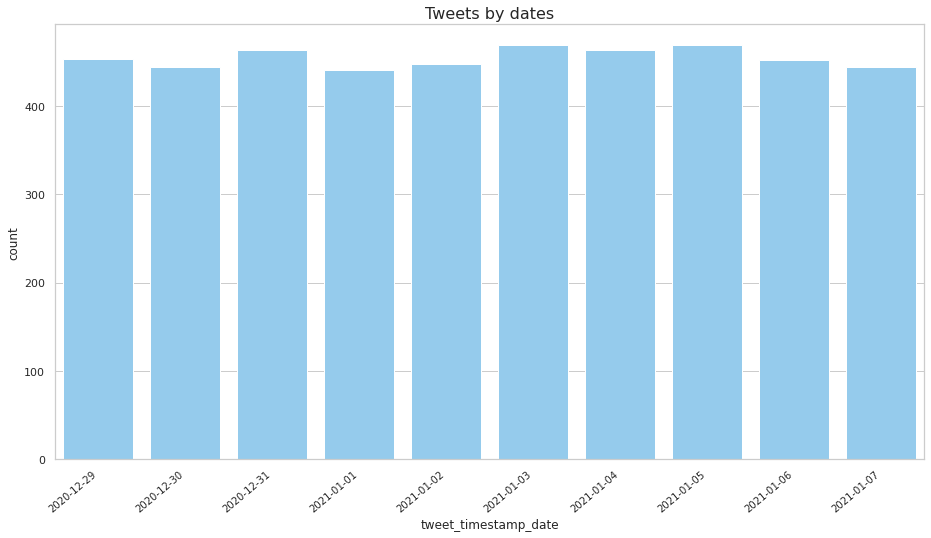

In [37]:
plottingHelper.count_categorical(df = df_Tweets_mod, 
                                 x_var = 'tweet_timestamp_date', 
                                 ax_title = 'Tweets by dates', 
                                 x_size = 16, 
                                 y_size = 8,
                                 bar_color = "lightskyblue",
                                 box_aspect_radio = 5)

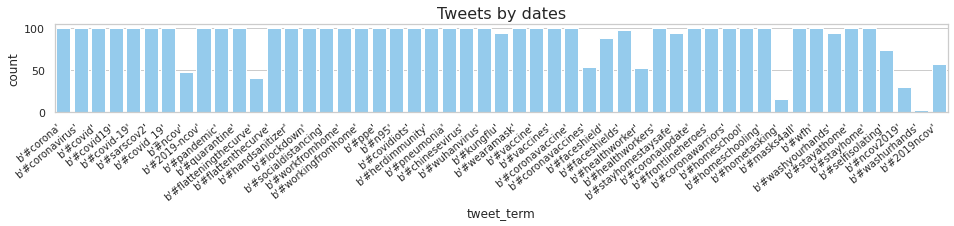

In [38]:
plottingHelper.count_categorical(df = df_Tweets_mod, 
                                 x_var = 'tweet_term', 
                                 ax_title = 'Tweets by dates', 
                                 x_size = 16, 
                                 y_size = 8,
                                 bar_color = "lightskyblue",
                                 box_aspect_radio = 5)

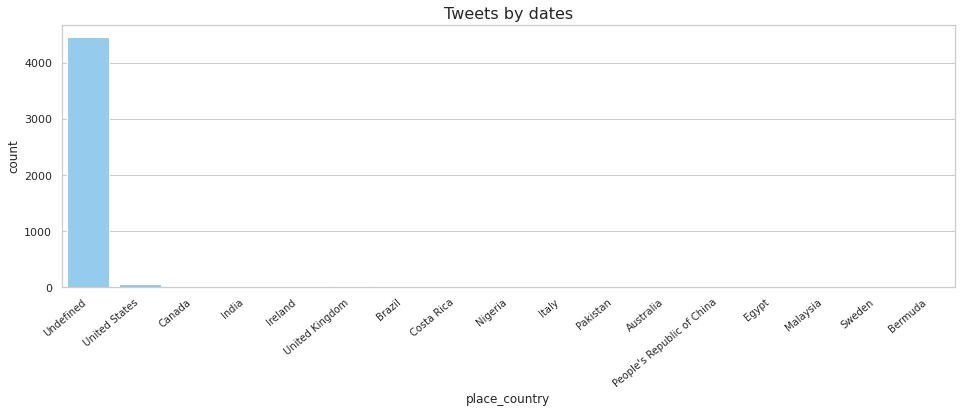

In [39]:
plottingHelper.count_categorical(df = df_Tweets_mod, 
                                 x_var = 'place_country', 
                                 ax_title = 'Tweets by dates', 
                                 x_size = 16, 
                                 y_size = 8,
                                 bar_color = "lightskyblue",
                                 box_aspect_radio = 5)

<h3 style="background-color:powderblue;">Data cleaning</h3>

In [40]:
#Removing Stopwords, punctuations and Lemmatizing

In [41]:
#I decided to use the largest one
spacy_lg = spacy.load('en_core_web_lg')

In [42]:
# sets of punctuation in variable result 
punctuation_str = string.punctuation  
punctuation_str #I want to know if @ is actually include

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
#Stop words Set
#stop_words = spacy.lang.en.stop_words.STOP_WORDS
stop_words = cleaningHelper.get_custom_stop_words(spacy_ = spacy_lg)

In [44]:
#English parser object
parser = spacy.lang.en.English()

In [45]:
#https://spacy.io/api/annotation
#tweet_sentence = "@BBCNews @bbcquestiontime why doesn't the BBC report on the numbers of vaccines administered? You give figures on e… https://t.co/hVCqr7pf1z "
#doc_tokens = parser(tweet_sentence)
#for token in doc_tokens:
#    print(f"text:{token.text}, lemma_:{token.lemma_}, lower_:{token.lower_}, pos_:{token.pos_}, tag_:{token.tag_}, dep_:{token.dep_}, shape_:{token.shape_}, Is_alpha:{token.is_alpha}, Is_stop:{token.is_stop}")

In [46]:
#type(doc_tokens)

In [47]:
# Removing twitter - username 
#doc_tokens = [ token_ for token_ in doc_tokens if len(cleaningHelper.get_twitter_username_str(token_ = token_.lemma_.lower().strip())) == 0 ]

# Removing token - URL 
#doc_tokens = [ token_ for token_ in doc_tokens if len(cleaningHelper.get_url_str(token_ = token_.lemma_.lower().strip())) == 0 ]

# Lemmatizing each token and converting each token into lowercase
#doc_tokens = [ token_.lemma_.lower().strip() if token_.lemma_ != "-PRON-" else token_.lower_ for token_ in doc_tokens ]

# Removing stop words
#doc_tokens = [ token_ for token_ in doc_tokens if token_ not in stop_words and token_ not in punctuation_str ]

In [48]:
#doc_tokens

In [49]:
#https://spacy.io/api/annotation
#tweet_sentence = "@BBCNews @bbcquestiontime why doesn't the BBC report on the numbers of vaccines administered? You give figures on e… https://t.co/hVCqr7pf1z "
#doc_tokens = cleaningTweets.do_spacy_tokenizer(token_ = tweet_sentence)
#doc_tokens

In [50]:
cleaningTweets = CleaningTweets(version = "1.0", spacy_ = spacy_lg, parser_ = parser, punctuation_str_ = punctuation_str, stop_words_ = stop_words)
print(cleaningTweets)

Cleaning Tweets version 1.0


In [51]:
#type(doc_tokens)

In [52]:
#cleaningTweets.get_custom_stop_words()

In [53]:
#https://spacy.io/api/annotation
#tweet_sentence = "@BBCNews @bbcquestiontime why doesn't the BBC report on the numbers of vaccines administered? You give figures on e… https://t.co/hVCqr7pf1z "
#doc_tokens = cleaningTweets.do_spacy_tokenizer(token_ = tweet_sentence)
#doc_tokens

In [54]:
#for index, row in df_Tweets_mod.iterrows():
#    token_ = str(row["tweet"], encoding='UTF-8')
#    doc_tokens = cleaningTweets.do_spacy_tokenizer(token_ = token_)

In [55]:
#len(doc_tokens)

In [56]:
#doc_tokens

In [57]:
#df_doc_tokens = pd.DataFrame(columns = ['token_']) 
#ls_tokens = ['kentucky', 'covid', 'cases', 'increase', '261,492', 'deaths', '2,594', 'kentucky', '2019-ncov', 'recombinomics', 'inc.']
#for tokens_ in ls_tokens:
#    df_doc_tokens = df_doc_tokens.append({'token_' : tokens_}, ignore_index = True) 
#    print(tokens_)

In [58]:
#df_doc_tokens

In [59]:
#df_doc_tokens = pd.DataFrame({'token_': pd.Series([], dtype='str')})

In [60]:
df_doc_tokens = cleaningTweets.get_words_df(df_Tweets_ = df_Tweets_mod)

In [61]:
df_doc_tokens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41832 entries, 0 to 41831
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   token_  41832 non-null  object
dtypes: object(1)
memory usage: 326.9+ KB


In [62]:
df_doc_tokens.head(3)

,token_
0,designed
1,minimal
2,minimalposter


In [63]:
df_doc_tokens.groupby(['token_']).token_.value_counts().nlargest(5)

token_       token_     
covid19      covid19        541
covid        covid          279
vaccine      vaccine        272
people       people         245
coronavirus  coronavirus    244
Name: token_, dtype: int64

In [64]:
#Top 10 tokens
df_doc_tokens_grp = df_doc_tokens[['token_']].groupby(['token_'])['token_'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)
df_doc_tokens_grp

,token_,count
2709,covid19,541
2704,covid,279
9321,vaccine,272
6735,people,245
2631,coronavirus,244
2706,covid-19,219
2959,deaths,209
6611,pandemic,188
417,2020,174
9424,virus,171


In [65]:
ls_doc_tokens = cleaningTweets.get_words_list(df_Tweets_ = df_doc_tokens)
#ls_doc_tokens

In [66]:
word_freq = collections.Counter(ls_doc_tokens)
word_freq.most_common(10)

[('covid19', 541),
 ('covid', 279),
 ('vaccine', 272),
 ('people', 245),
 ('coronavirus', 244),
 ('covid-19', 219),
 ('deaths', 209),
 ('pandemic', 188),
 ('2020', 174),
 ('virus', 171)]

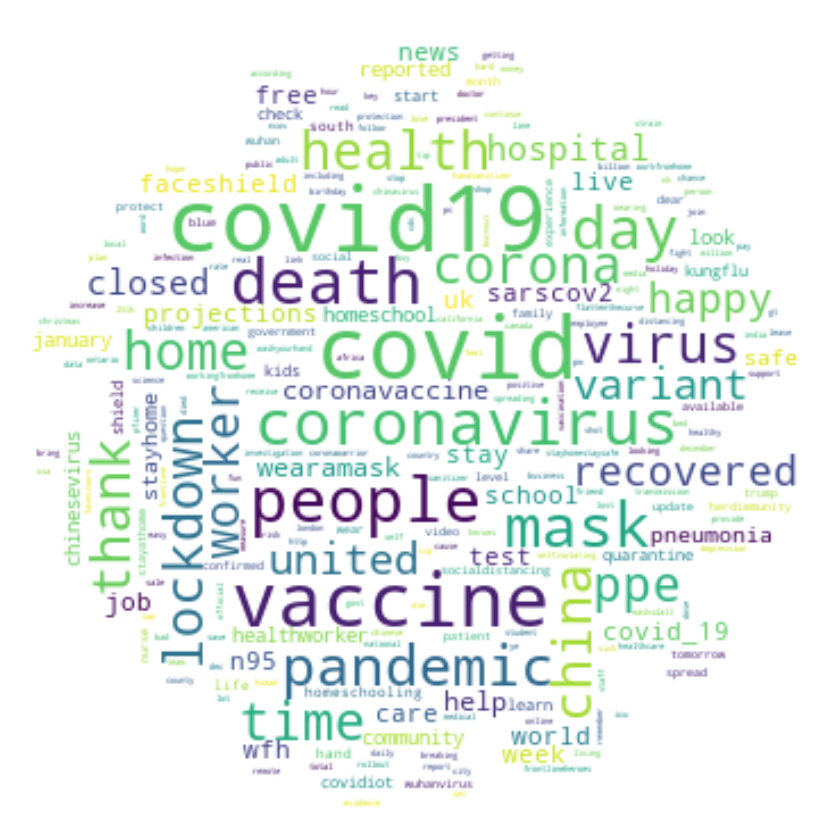

In [67]:
#Instantiate mask
char_mask = np.array(Image.open("covid19.png")) 
#Instantiate the wordcloud object
wc = wordcloud.WordCloud(background_color='white', max_words=300, stopwords=stop_words, collocations=False, max_font_size=40, random_state=42, mask=char_mask)
# Generate word cloud
wc=wc.generate(" ".join(ls_doc_tokens).lower())
# Show word cloud
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#transfer learning